In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
#One-Hot-encoding 예
keras.utils.to_categorical([0,1,2,3,2,0,3], num_classes=4)  # [1,0,0,0] 이 0이 되고 [0,1,0,0] 이 1이 되는 것

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=3)
X.shape, y.shape

((500, 2), (500,))

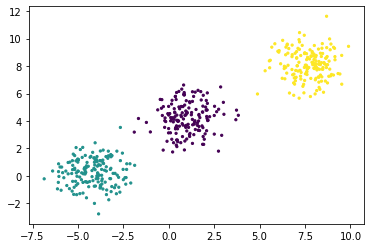

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, s=5)
plt.show()

In [5]:
y[:20]  #0,1,2로 이루어진 범주형 데이터 이기에 one-hot-encoding이 필요하다

array([1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2])

In [6]:
#y 데이터를 one-hot-encoding화
y_ohe = keras.utils.to_categorical(y, num_classes=3)
y_ohe.shape

(500, 3)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 2), (100, 2), (400, 3), (100, 3))

In [8]:
model = Sequential()

#신경망 만들기
#입력층
#model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(100, input_dim=2, activation='relu')) #차원수


model.add(Dense(70, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))

#출력층
model.add(Dense(3, activation='softmax'))  # y_train의 속성수, 정답수 

model.compile(loss='categorical_crossentropy', optimizer='adam')  #log loss와 같은 의미
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 40)                2840      
                                                                 
 dense_3 (Dense)             (None, 10)                410       
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
Total params: 10,653
Trainable params: 10,653
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(X_train, y_train, batch_size=1, validation_split=0.2, epochs=20)

Epoch 1/20
320/320 [==============================] - 3s 5ms/step - loss: 0.2046 - val_loss: 0.0140
Epoch 2/20
320/320 [==============================] - 1s 5ms/step - loss: 0.0849 - val_loss: 0.0108
Epoch 3/20
320/320 [==============================] - 2s 5ms/step - loss: 0.0580 - val_loss: 0.0105
Epoch 4/20
320/320 [==============================] - 2s 5ms/step - loss: 0.0359 - val_loss: 0.0036
Epoch 5/20
320/320 [==============================] - 1s 4ms/step - loss: 0.0289 - val_loss: 0.0042
Epoch 6/20
320/320 [==============================] - 2s 5ms/step - loss: 0.0566 - val_loss: 0.0120
Epoch 7/20
320/320 [==============================] - 2s 6ms/step - loss: 0.0423 - val_loss: 0.0023
Epoch 8/20
320/320 [==============================] - 2s 6ms/step - loss: 0.0733 - val_loss: 0.0111
Epoch 9/20
320/320 [==============================] - 2s 8ms/step - loss: 0.0259 - val_loss: 0.0016
Epoch 10/20
320/320 [==============================] - 3s 8ms/step - loss: 0.0079 - val_loss: 3.9250

In [10]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

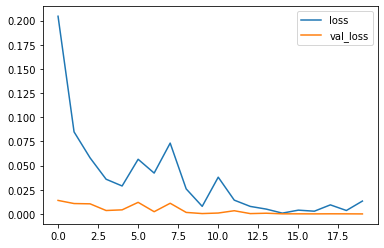

In [11]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0299


0.029873359948396683

In [13]:
y_pred = model.predict(X)

16/16 [==============================] - 0s 4ms/step


In [14]:
y_pred.shape

(500, 3)

In [15]:
y_pred[0] #0.000001, 0.9999, 0.000000001 의 답이 나왔으므로 답은 0,1,2번중 1번이다.

array([1.9007042e-06, 9.9999177e-01, 6.3591806e-06], dtype=float32)

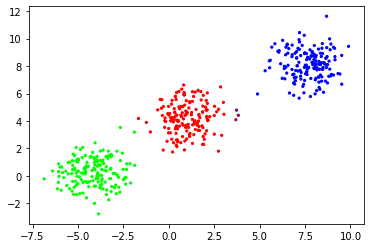

In [16]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=5)
plt.show()

* 생성된 모델에 sample 데이터 입력하고 결과 보기

In [ ]:
y_tmp = model.predict([[40,8]])

In [ ]:
y_tmp

In [ ]:
import numpy as np
np.argmax(y_tmp)

* 파일에 저장

In [ ]:
model.save('tf_multiClass.mdl')
print('학습된 모델을 파일에 저장 완료')

In [ ]:
loaded_model = keras.models.load_model('tf_multiClass.mdl')
loaded_model

In [ ]:
y_tmp = loaded_model.predict([[40,8]])

In [ ]:
y_tmp

# Flask

In [17]:
import flask

In [18]:
from flask import Flask

In [20]:
app = Flask(__name__)

@app.route('/', methods=['POST', 'GET'])
def index():
    loaded_model = keras.models.load_model('tf_multiClass.mdl')
    
    x = request.args.get('x')
    y = request.args.get('y')
    print('x=%s, y=%s').format(x,y)
    
    
    
    return "Classification Result: " + str(np.argmax(y_tmp))

app.run(host='0.0.0.0', port=2222)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://172.30.1.70:2222/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Sep/2022 12:54:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:54:06] "GET /favicon.ico HTTP/1.1" 404 -
